# Lab 4. The Marcenko-Pastur Law and Semicircle Law

### Due date: Friday 02/25 at 10:59 pm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi

As the name suggests, a `random matrix` is a matrix whose entries are random variables. The behaviors of eigenvalues and eigenvectors of a random matrix areof main interest in RMT. In particular, most works focus on the characteristics of the eigenvalues (a.k.a. the spectrum) of the random matrices. In addition, the spectra of Hermitian matrices are widely studied since their eigenvaluesare real. In this lab, we will introduce two fundamental results in RMT.

## Part 1. The Marcenko-Pastur law

If $X$ denotes a $p\times n$ random matrix whose entries are independent identically distributed random variables with mean $0$ and variance $1$. Let

$$ Y_{n}={\frac {1}{n}}XX^{T} \in \mathbb{R}^{p\times p}$$
and let $\lambda _{1},\,\lambda _{2},\,\dots ,\,\lambda _{p}$ be the eigenvalues of $Y_{n}$ (viewed as random variables). Finally, consider the random measure
$$\mu _{p}(A)={\frac {1}{p}}\#\left\{\lambda _{j}\in A\right\},\quad A\subset \mathbb {R}.$$

Assume that $p,\,n\,\to \,\infty$  so that the ratio $p/n\,\to \,\gamma \in (0,+\infty )$. Then $\mu _{p}\,\to \,\mu$ in distribution, where

$$
\mu(A) = \begin{cases} 
        (1-\frac{1}{\gamma}) \mathbf{1}_{0\in A} + \nu(A),& \text{if } \gamma >1,\\
        \nu(A),& \text{if } 0\leq \gamma \leq 1,
        \end{cases}
$$
and
$$
d\nu (x)= {\frac {\sqrt {(\lambda_{+}-x)(x-\lambda _{-})}}{2\pi\gamma x}}\,\mathbf{1}_{x\in [\lambda _{-},\lambda _{+}]}\,dx
$$
with $\lambda_{\pm }=(1\pm {\sqrt {\lambda }})^{2}$.

In [2]:
gamma = 4
n = 1000
p = n*gamma
X = np.array(np.random.randn(p,n))

In [3]:
Y = X@X.T/n # Sample Covariance Matrix
a = (1 - np.sqrt(gamma))**2
b = (1 + np.sqrt(gamma))**2

"""
TODO: 1. Compute eigenvalues and eigenvectors of SCM, using variable names eigvals, eigvecs
"""

### BEGIN SOLUTION
eigvals, eigvecs = np.linalg.eigh(Y)
### END SOLUTION

print("The number of eigenvalues is", len(eigvals))

The number of eigenvalues is 4000


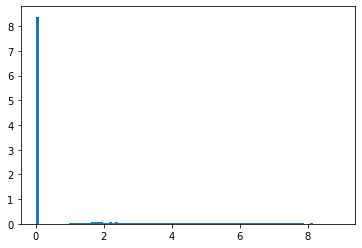

In [4]:
plt.hist(eigvals,density=True,bins=100, label='Empirical eigenvalues');

#### Zoom in to see the part without zeros.

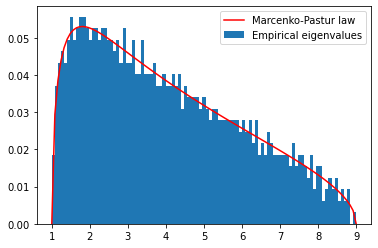

In [5]:
# Limiting measure
edges = np.linspace(a,b,100);
mu = np.sqrt((edges-a)*(b-edges))/(2*pi*gamma)

# Empirical histogram

plt.hist(eigvals,bins=edges,weights=1/(p*(edges[1]-edges[0])*np.ones(p)),label='Empirical eigenvalues')
plt.plot(edges,mu/edges,'r',label='Marcenko-Pastur law')
_ = plt.legend()

In [6]:
"""
TODO: 2. Let gamma = 0.5 and n = 4000, plot the empirical eigenvalues and theoretically line.
"""

### BEGIN SOLUTION
gamma = 0.5
n = 4000
p = int(n*gamma)
X2 = np.array(np.random.randn(p,n))

Y2 = X2@X2.T/n # Sample Covariance Matrix
a = (1 - np.sqrt(gamma))**2
b = (1 + np.sqrt(gamma))**2
eigvals2, eigvecs2 = np.linalg.eigh(Y2)
### END SOLUTION

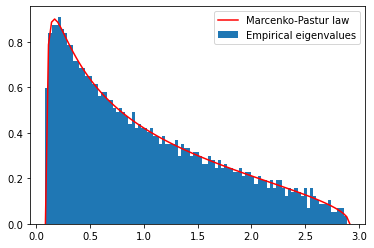

In [7]:
edges = np.linspace(a,b,100);
mu = np.sqrt((edges-a)*(b-edges))/(2*pi*gamma)

plt.hist(eigvals2,bins=edges,weights=1/(p*(edges[1]-edges[0])*np.ones(p)),label='Empirical eigenvalues')
plt.plot(edges,mu/edges,'r',label='Marcenko-Pastur law')
_ = plt.legend()

In [8]:
def MP_law(gamma):
    a = (1 - np.sqrt(gamma))**2
    b = (1 + np.sqrt(gamma))**2
    edges = np.linspace(a,b,100);
    mu = np.sqrt((edges-a)*(b-edges))/(2*pi*gamma)
    return mu, edges

/tmp/ipykernel_4408/73155308.py:10: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(edges1,mu1/edges1,'g',label='gamma = 1')


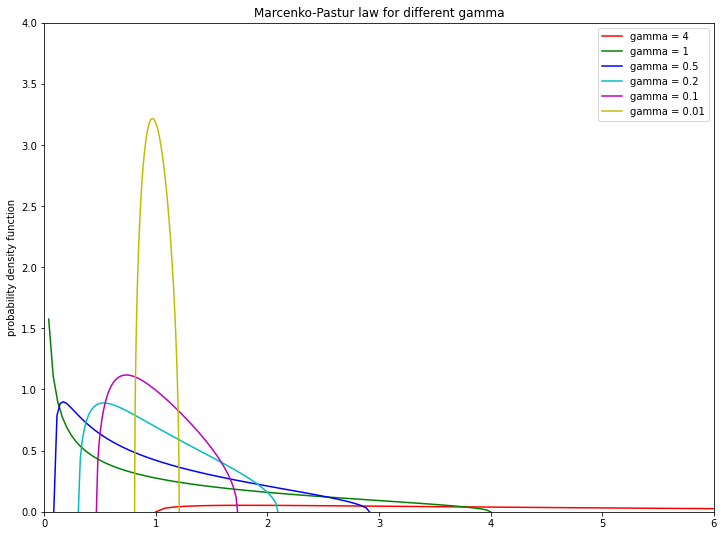

In [9]:
mu4, edges4 = MP_law(4)
mu1, edges1 = MP_law(1)
mu05, edges05 = MP_law(0.5)
mu02, edges02 = MP_law(0.2)
mu01, edges01 = MP_law(0.1)
mu001, edges001 = MP_law(0.01)

plt.figure(figsize=(12,9))
plt.plot(edges4,mu4/edges4,'r',label='gamma = 4')
plt.plot(edges1,mu1/edges1,'g',label='gamma = 1')
plt.plot(edges05,mu05/edges05,'b',label='gamma = 0.5')
plt.plot(edges02,mu02/edges02,'c',label='gamma = 0.2')
plt.plot(edges01,mu01/edges01,'m',label='gamma = 0.1')
plt.plot(edges001,mu001/edges001,'y',label='gamma = 0.01')
plt.ylabel("probability density function")
plt.title('Marcenko-Pastur law for different gamma')
plt.xticks([0,1,2,3,4,5,6])
plt.xlim([0, 6])
plt.ylim([0, 4])
plt.legend()
plt.show()

## Part 2. The Wigner semi-circle law

 
Consider an $n\times n$ random Hermitian matrix $X_n$ with independent entries $(X_n)_{ij}$ such that 

* $\mathbb{E}[(X_n)_{ij}]=0$,
* $\mathbb{E}[(X_n)_{ij}^2]=1/n$
* $(X_n)_{ij}$ has a moment of order $2+\epsilon$ for an existing $\epsilon$,

Let $\lambda_1,\dots, \lambda_n$ denote the eigenvalues of $X_n$ and $mathbf{1}_{\lambda_j \leq x}(x)$ denote the indicator function, which equals 1 when $\lambda_j \leq x$ or $0$ otherwise. Define the `empirical spectrum density(e.s.d.)` by
$$
    F_{X_n}(x) = \frac{1}{n}\sum_{j=1}^n \mathbf{1}_{\lambda_j \leq x}(x)\,.
$$
As $n\to \infty$, its `e.s.d.` converges weakly and almost surely to a non-random limit distribution $F_X$, which is defined as the `limit spectrum distribution(l.s.d.)` of $X_n$, whose probability density function(p.d.f.) is given by
$$
    sc(x) = \frac{1}{2\pi}\sqrt{4 - x^2}~\mathbf{1}_{[-2, 2]}(x).
$$

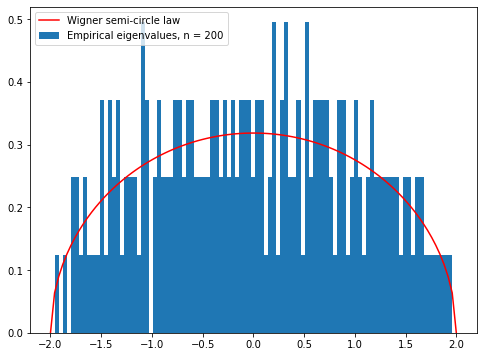

In [10]:
n = 200

Z = np.array(np.random.randn(n,n))
X_200 = np.triu(Z) + np.triu(Z,1).T

edges=np.linspace(-2,2,100)
mu = np.sqrt(np.maximum.reduce( [4 - edges**2, np.zeros(len(edges))] ) )/(2*pi)

plt.figure(figsize=(8,6))
plt.hist(np.linalg.eigh(X_200/np.sqrt(n))[0],bins=edges,weights=1/(n*(edges[1]-edges[0])*np.ones(n)),label='Empirical eigenvalues, n = 200')
plt.plot(edges,mu,'r',label='Wigner semi-circle law')
_ = plt.legend()

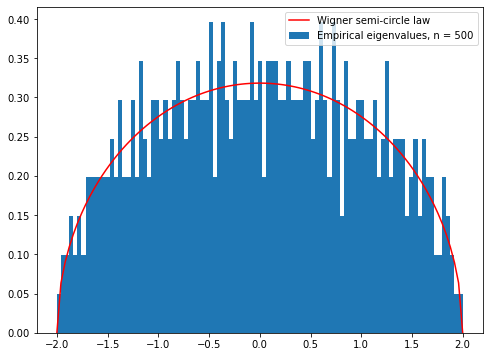

In [11]:
"""
TODO: 3. Let n = 500, plot the empirical eigenvalues and theoretically line.
"""

### BEGIN SOLUTION
n = 500

Z = np.array(np.random.randn(n,n))
X_500 = np.triu(Z) + np.triu(Z,1).T
edges=np.linspace(-2,2,100)
mu = np.sqrt(np.maximum.reduce( [4 - edges**2, np.zeros(len(edges))] ) )/(2*pi)

plt.figure(figsize=(8,6))
plt.hist(np.linalg.eigh(X_500/np.sqrt(n))[0],bins=edges,weights=1/(n*(edges[1]-edges[0])*np.ones(n)),label='Empirical eigenvalues, n = 500')
plt.plot(edges,mu,'r',label='Wigner semi-circle law')
_ = plt.legend()
### END SOLUTION

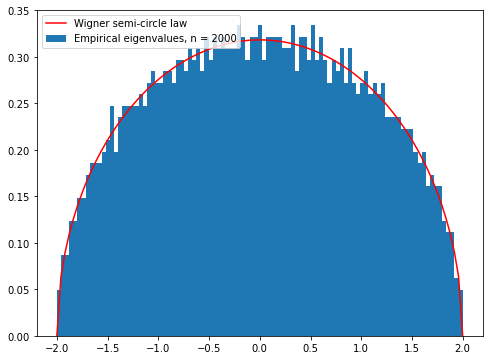

In [12]:
"""
TODO: 4. Let n = 2000, plot the empirical eigenvalues and theoretically line.
"""

### BEGIN SOLUTION
n = 2000

Z = np.array(np.random.randn(n,n))
X_2000 = np.triu(Z) + np.triu(Z,1).T
edges=np.linspace(-2,2,100)
mu = np.sqrt(np.maximum.reduce( [4 - edges**2, np.zeros(len(edges))] ) )/(2*pi)

plt.figure(figsize=(8,6))
plt.hist(np.linalg.eigh(X_2000/np.sqrt(n))[0],bins=edges,weights=1/(n*(edges[1]-edges[0])*np.ones(n)),label='Empirical eigenvalues, n = 2000')
plt.plot(edges,mu,'r',label='Wigner semi-circle law')
_ = plt.legend()
### END SOLUTION

## Submission Instructions


### Download Code Portion
* Restart the kernel and run all the cells to make sure your code works.
* Save your notebook using File > Save and Checkpoint.
* Use File > Downland as > PDF via Latex.
* Download the PDF file and confirm that none of your work is missing or cut off. 
* **DO NOT** simply take pictures using your phone. 

### Submitting ###
* Submit the assignment to Lab1 on Gradescope. 
* **Make sure to assign only the pages with your implementation to the question.**